**Copyright: © NexStream Technical Education LLC**.  
All rights reserved

# Implement the KNN class
In this project you will implement the K-nearest-neighbors algorithm to make predictions on unknown data points.  
Please refer to the lecture material for more information on KNN.  
First, you will create a class 'KNN' and implement the following methods.

<br>


Constructor:  
**def __init__(self, max_K=10):**  
- Inputs:  max_K = max iterations to search for K
- Initialize the following instance variables:  
     self.max_K = max_K  
     self.x_train = None  
     self.y_train = None  
     self.x_test = None  
     self.y_test = None  
     self.rmse = array of zeros of size max_K  

<br>

Split and scale the input dataset:  
**def split_scale(self, X, Y, test_size, split_seed):**
- Inputs:
  - X = indep variables
  - Y = dependent variables
  - test_size = percentage of the dataset split for the test data
  - split_seed = random seed for test purposes.
- Return: x_train, x_test (for test purposes), otherwise the instance variables x_train and x_test should be updated.
- Hint:  Implement the following: $$X_{scaled}=\frac{X-min(X)}{max(X)-min(X)} $$
- Hint:  (alternatively, scaling can be done using the following sklearn functions with feature_range set to [0,1]):  
- Hints (you may use the following sklearn functions):  
  - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
  - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform

<br>

Train the model using scikit-learn:  
**def train_model(self):**
- Inputs: None
- Return: rmse, K which minimizes the rmse
- Hints.  See the pseudo code below.  You may use the following sklearn functions.
      Loop over range of max_K neighbors. For each K:
        Fit the model with the train data
        Make predictions on the test data
        Calculate a score
        Calculate the RMSE
      Save best K to variable 'K'
  - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
  - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.fit
  - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.predict


<br>

Plot the costs:  
**def plot_rmse(self):**
- Inputs: None
- Return: None
- Hints:  Plot the RMSE vs. K stored in the training.


<br>

Predict the results:  
**def predict_result(self, df, df2, K, df3):**
- Inputs:
  - df = input dataset dataframe independent variables
  - df2 = test dataset dataframe independent variables
  - df3 = dependent variables (labels) from input dataset
  - K = number of neighbors to use in the prediction
- Return: Top K indices, predicted result
- Hints:
  - Scale the input data with the same scale factor used with the training data.
  - Set up an array to store the top K distances and their indices.
  - Find and store the distances from the K nearest points to the unknown point, where K is that which minimized the RMSE (best K for the model).
  - Sort the distances and indices in increasing order (smallest distance to largest distance).
  - Get the top K indices
  - Predict the unknown dependent variable using the average of the sum of dependent labels provided for the K nearest neighbors.


Perform the steps as outlined in the following code cell to implement the following class constructor and methods.


In [32]:
#KNN class

#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

"""
Implement KNN:


 """

'\nImplement KNN:\n\n  \n '

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt


#KNN Class


class KNN:
    def __init__(self, max_K=10):
        self.max_K = max_K
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        self.rmse = np.zeros(max_K)
        self.scaler = MinMaxScaler()

    def split_scale(self, X, Y, test_size, split_seed):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, Y, test_size=test_size, random_state=split_seed)
        self.x_train = self.scaler.fit_transform(self.x_train)
        self.x_test = self.scaler.transform(self.x_test)
        return self.x_train, self.x_test

    def train_model(self):
        best_K = 1
        best_rmse = float('inf')
        for K in range(1, self.max_K+1):
            model = KNeighborsRegressor(n_neighbors=K)
            model.fit(self.x_train, self.y_train)
            y_pred = model.predict(self.x_test)
            self.rmse[K-1] = sqrt(mean_squared_error(self.y_test, y_pred))
            if self.rmse[K-1] < best_rmse:
                best_rmse = self.rmse[K-1]
                best_K = K
        return self.rmse, best_K

    def plot_rmse(self):
        plt.plot(range(1, self.max_K+1), self.rmse, color="green")
        plt.title('RMSE vs K')
        plt.xlabel('K')
        plt.ylabel('RMSE')
        plt.show()

    def predict_result(self, df, df2, K, df3):
        scaler = MinMaxScaler()
        df_scaled = scaler.fit_transform(df)
        df2_scaled = scaler.transform(df2)
        model = KNeighborsRegressor(n_neighbors=K)
        model.fit(df_scaled, df3)
        y_pred = model.predict(df2_scaled)
        distances, indices = model.kneighbors(df2_scaled)
        top_K_indices = indices[:, :K]
        return top_K_indices, y_pred

# Assignment - Part 1



In this assignment, you will use KNN to create a classification model using a small "Physical statistics" dataset to predict a person's Activity Level.  

The cell below provides the raw data.

Perform the following steps as outlined in the following code cell.
- **Step 1:**  Read the PhysicalStats dataset (df), and Input dataset (df2) into a Pandas dataframe and print out the statistics
- **Step 2:**  Plot dataset to examine the relationship between the two indep
variables, 'Age' and 'Height'.  You should see a plot like the following:
![alt text](https://docs.google.com/uc?export=download&id=1nmLG9TqOZVUNrupbkk43NnwmtRLdCnT5)
- **Step 3:**  Split the data into training and testing
Use 80% - 20% train-test split.  
- **Step 4:**  Scale the training data between 0, 1.  
- **Step 5:**  Train the KNN model using scikit-learn.  
- **Step 6:** Plot the costs (RMSE vs K).  Your plot should look like the following:
![alt text](https://docs.google.com/uc?export=download&id=1-JBSshpw95ejg5oRvnVr0hPsHSMPeU1W)

- **Step 7:** Use the best K for estimating the unknown data (lowest RMSE).

Make sure your code passes the doctests at the end of the cell.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

PhysicalStats = {
                'Height': [5.0,5.9,5.5,5.8,4.7,5.7,5.3,5.7,5.4,5.5,6.2,6.0,5.8,4.9],
                'Age': [45,26,30,34,40,36,19,22,23,32,35,25,18,20],
                'Gender': [0,1,1,0,1,1,0,0,0,1,0,1,0,0],
                'ActivityLevel': [1,4,2,4,3,2,4,2,2,3,4,1,1,0],
                'AvgSleep': [6.5,7.0,8.1,6.6,7.2,5.4,6.9,7.5,9.0,6.3,7.2,6.1,5.5,7.3],
                'Weight': [170,104,121,130,159,132,88,132,99,128,181,168,145,110]
                 }

Input = {
        'Height': [5.3],
        'Age': [39],
        'Gender': [1],
        'ActivityLevel': [float("NaN")],
        'AvgSleep': [6.1],
 	      'Weight': [158]
         }


#Step 1:  Read the PhysicalStats dataset (df), and Input dataset (df2) into a Pandas dataframe and examine the statistics
#df = None
#df2 = None

df = pd.DataFrame(PhysicalStats)
df2 = pd.DataFrame(Input)

print(np.round(df['Weight'].mean(), 2))
print(np.round(df['AvgSleep'].mean(), 2))


133.36
6.9


In [4]:
print(df.describe())
print(df2.describe())

          Height        Age     Gender  ActivityLevel   AvgSleep      Weight
count  14.000000  14.000000  14.000000      14.000000  14.000000   14.000000
mean    5.528571  28.928571   0.428571       2.357143   6.900000  133.357143
std     0.433995   8.361673   0.513553       1.336306   0.961569   28.348402
min     4.700000  18.000000   0.000000       0.000000   5.400000   88.000000
25%     5.325000  22.250000   0.000000       1.250000   6.350000  112.750000
50%     5.600000  28.000000   0.000000       2.000000   6.950000  131.000000
75%     5.800000  34.750000   1.000000       3.750000   7.275000  155.500000
max     6.200000  45.000000   1.000000       4.000000   9.000000  181.000000
       Height   Age  Gender  ActivityLevel  AvgSleep  Weight
count     1.0   1.0     1.0            0.0       1.0     1.0
mean      5.3  39.0     1.0            NaN       6.1   158.0
std       NaN   NaN     NaN            NaN       NaN     NaN
min       5.3  39.0     1.0            NaN       6.1   158.0
25

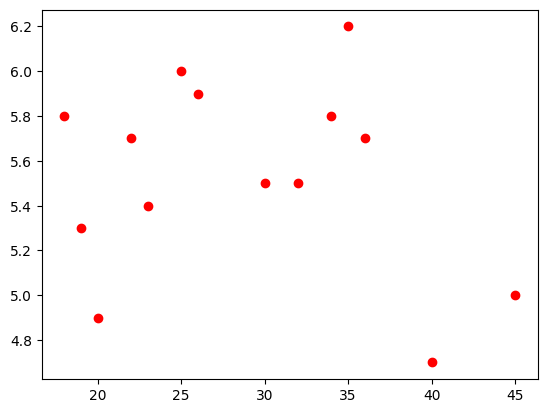

In [5]:
#Step 2:  Plot dataset to examine the relationship between the two indep
#         variables, 'Age' and 'Height'.
#YOUR CODE HERE

plt.scatter(df['Age'], df['Height'], color="Red")
plt.show()



In [6]:
#Step 3:  Instantiate a KNN object
#knn = None

knn = KNN(max_K=10)


In [7]:
#Step 4:  Create a training and test split of 80% train and 20% test from the dataset.
#         Use the features (X = independent variables), 'Weight' and 'AvgSleep'
#         and Y = dependent variable, 'ActivityLevel'.
#         Use a random_state (split_seed) of 1.

#X = None    #indep vars
#Y = None    #dep var
#knn.None    #Use 80/20 split and random state of 1


X = df[['Weight', 'AvgSleep']]

Y = df['ActivityLevel']

knn.split_scale(X, Y, 0.2, 1)


(array([[0.26829268, 0.75      ],
        [1.        , 0.5       ],
        [0.73170732, 0.5       ],
        [0.06097561, 0.44444444],
        [0.56097561, 0.02777778],
        [0.86585366, 0.30555556],
        [0.13414634, 0.52777778],
        [0.35365854, 0.25      ],
        [0.        , 1.        ],
        [0.84146341, 0.19444444],
        [0.40243902, 0.        ]]),
 array([[ 0.37804878,  0.33333333],
        [ 0.40243902,  0.58333333],
        [-0.13414634,  0.41666667]]))

In [8]:
 knn.split_scale(X, Y,0.2,0)[0].mean()

0.4599239144693691

In [9]:
#Step 5: Train the model
#RMSE, best_K = knn.None

RMSE, best_K = knn.train_model()

print(RMSE)
print(best_K)

[0.57735027 1.32287566 0.94280904 0.92421138 0.90921211 0.95742711
 1.04978132 1.16592238 1.2488678  1.25565388]
1


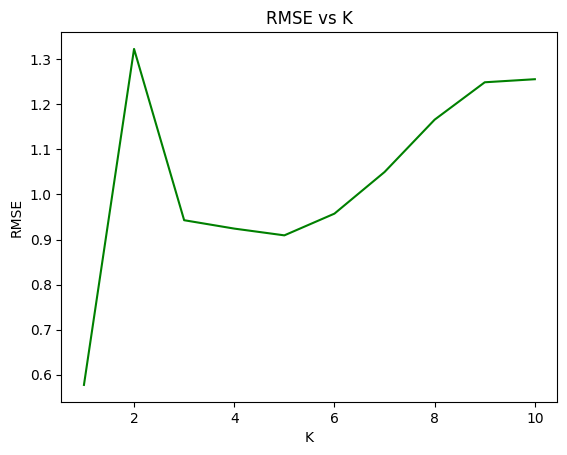

In [10]:
#Step 6:  Plot the costs (rmse's)
#knn.None

knn.plot_rmse()

In [11]:
#Step 7: Make predictions using the best K for estimating the unknown data (lowest RMSE).
#input_df = None
#test_df = None


input_df = pd.DataFrame(Input)


test_df = input_df[['Weight', 'AvgSleep']]

#def predict_result(self, df, df2, K, df3):

top_K_indices, pred_Result = knn.predict_result(df[['Weight', 'AvgSleep']], test_df, best_K, df['ActivityLevel'])
print(top_K_indices, pred_Result)


[[11]] [1.]


In [12]:
 knn.predict_result(df[['Weight', 'AvgSleep']], df2[['Weight', 'AvgSleep']], best_K, df['ActivityLevel'])

(array([[11]]), array([1.]))

In [13]:
#-------------------------------------------------------------------------------------------------
#Test with the following doctest test vectors.
#DO NOT EDIT THE TEST CODE!!!!
#1. original df 'Weight' indep var mean
#2. original df 'AvgSleep' indep var mean
#3. split and scaled X training data 'Height' (0th tuple element, column 0)
#4. split and scaled X testing data 'Age' (1st tuple element, column 1)
#5. RMSE minimum
#6. Best K value
#7. Predicted result
import doctest
"""
   >>> print(np.round(df['Weight'].mean(), 2))
   133.36
   >>> print(np.round(df['AvgSleep'].mean(), 2))
   6.9
   >>> print(np.round(knn.split_scale(X, Y, 0.2, 1)[0].mean(),2))
   0.44
   >>> print(np.round(knn.split_scale(X, Y, 0.2, 1)[1].mean(),3))
   0.33
   >>> print(np.round(RMSE.min(), 2))
   0.58
   >>> print(best_K)
   1
   >>> print(knn.predict_result(df[['Weight', 'AvgSleep']], df2[['Weight', 'AvgSleep']], best_K, df['ActivityLevel']))
   (array([[11]], dtype=int64), array([1.]))
  """

doctest.testmod()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



**********************************************************************
File "__main__", line 15, in __main__
Failed example:
    print(knn.predict_result(df[['Weight', 'AvgSleep']], df2[['Weight', 'AvgSleep']], best_K, df['ActivityLevel']))
Expected:
    (array([[11]], dtype=int64), array([1.]))
Got:
    (array([[11]]), array([1.]))
**********************************************************************
1 items had failures:
   1 of   7 in __main__
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=7)

# Assignment - Part 2

In this project, you will use the provided dataset, **‘BreastCancerDataset_KNN_test.csv’** and predict a patient’s diagnosis result.  
The dataset was downloaded from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) and modified for this project (please use the provided dataset csv file).

After creating your model, you will predict the diagnosis for the following feature measurement based on your KNN model and using only the 'mean radius' and 'mean texture' features.  

Record the Result and your best K value.  
input_1 =   
np.array([7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039])  
Note, you should be using only the 'mean radius' and 'mean texture' features for the prediction.
**Your predicted value should be 1 (malignant)**

<br>

input_2 =  
np.array([19.81,22.15,130,1260,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,0.7582,1.017,5.865,112.4,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398,0.1512,0.315,0.5372,0.2388,0.2768,0.07615])  
Note, you should be using only the 'mean radius' and 'mean texture' features for the prediction.
**Your predicted value should be 0 (benign)**

Follow the same procedure to preprocess, train, and make predictions.  Round your result since it should be a one-hot output.

Perform the following steps as outlined in the following code cell.a

- **Step 1:**  Read the provided project csv file.
Upload the file to your Colab files folder so that you can access it
from your script. Read in the provided csv file: "BreastCancerDataset.csv"
into a pandas dataframe.  Note the dataset has been prepared to include all the features used in the study as well as a "Result" column.   
You MUST use this file in your project.  
- **Step 2:**  Inspect the dataset, note the features (indep vars) and the result (last column).
Hint:  use the Pandas 'drop' function to remove unwanted rows or columns from the dataframe.
- **Step 3:**  Read the features (all but the 'Result' column) into a numpy array.
Hint:  Create a column headers array and use that with the Pandas 'to_numpy()' function to create the independent variable X.
- **Step 4:**  Read the results column ('Result') into the Y variable
Hint:  Use the Pandas 'values' function or 'to_numpy()' to return a numpy representation of the Result column into a dependent variable Y
Make sure your code passes the doctests at the end of the cell.
- **Step 5:**  Instantiate a KNN object
- **Step 6:**  Create a training and test split of 80% train and 20% test from the dataset. Use a random_state of 1.
- **Step 7:**  Create the model
- **Step 8:**  Plot the costs (RMSE vs. K).  Your costs should look like the following:
![alt text](https://docs.google.com/uc?export=download&id=1hpAEtktokf5q2DQNQccUZUdMh9PgKyD3)


- **Step 9:** Use the best K for estimating the unknown data (lowest RMSE).




In [14]:
#Mount your google drive and copy the dataset to your working directory
#or change your directory to the folder containing the dataset
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

#Copy (cp) the file to this directory or change directory (cd) to where your dataset is located.
%cd /content/drive/MyDrive/Colab Notebooks/


Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

#Step 1:
#         Upload the file, 'BreastCancerDataset_KNN_test.csv' to your Colab files folder
#         so that you can access it from your script. You MUST use this file in your project.
#         Read the file into a pandas dataframe.  Note the dataset has been prepared to include all
#         the features used in the study as well as a "Result" column indicating the cancer diagnosis mapped
#         to a one-hot output (1 for malignant, 0 for benign).

cancer_df = pd.read_csv('./BreastCancerDataset_KNN_test.csv')


In [16]:
#Step 2:  Inspect the dataset, note the features (indep vars) and the dependent variable, 'Result' (last column).
#         Remove unwanted rows or columns that are unnamed.
#         Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
#cancer_df = None
#cancer_df.None

cancer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               567 non-null    int64  
 1   mean radius              567 non-null    float64
 2   mean texture             567 non-null    float64
 3   mean perimeter           567 non-null    float64
 4   mean area                567 non-null    float64
 5   mean smoothness          567 non-null    float64
 6   mean compactness         567 non-null    float64
 7   mean concavity           567 non-null    float64
 8   mean concave points      567 non-null    float64
 9   mean symmetry            567 non-null    float64
 10  mean fractal dimension   567 non-null    float64
 11  radius error             567 non-null    float64
 12  texture error            567 non-null    float64
 13  perimeter error          567 non-null    float64
 14  area error               5

In [17]:
# Remove unwanted rows or columns that are unnamed.

cancer_df = cancer_df.loc[:, ~cancer_df.columns.str.contains('^Unnamed')]


In [18]:
#Step 3:  Read the features (all but the 'Result' column) into a numpy array.
#         Hint:  Create a column headers array and use that with the Pandas 'to_numpy()' function to create the independent variable X.

columnHeaders = cancer_df.columns.drop('Result')

X = cancer_df[columnHeaders].to_numpy()


In [19]:
#Step 4:  Read the results column ('Result') into the Y variable
#         Hint:  Use the Pandas 'values' function or 'to_numpy()' to return a numpy representation of the Result column into a dependent variable Y

columnHeaders = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points',
                 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error',
                 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter',
                 'worst area', 'worst smoothness',  'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension' ]

#Y = None
#X = None

Y = cancer_df['Result'].to_numpy()

In [20]:
#Step 5:  Instantiate a KNN object
#knn = None


In [21]:
#Step 6:  Create a training and test split of 80% train and 20% test from the dataset. Use a random_state of 1.
#knn.None

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)



In [22]:
#Apply scaling to the dataset

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
#Step 7:  Create the model
#RMSE, best_K = knn.None

rmse_val = [] # to store rmse values for different k

for K in range(10):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, Y_train)  # fit the model
    pred=model.predict(X_test) # make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) # calculate rmse
    rmse_val.append(error) # store rmse values


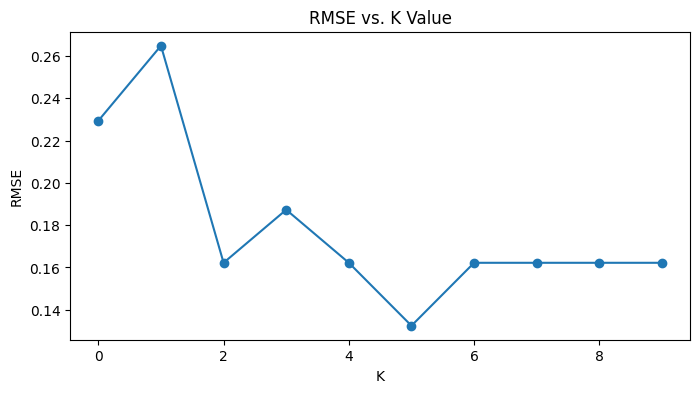

In [24]:
#Step 8:  Plot the costs (rmse's)
#knn.None

curve = pd.DataFrame(rmse_val) # elbow curve
plt.figure(figsize=(8,4))
plt.plot(curve, marker='o')
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()


In [25]:
#Step 9:  Use the best K for estimating the unknown data (lowest RMSE).
input_df = pd.DataFrame(cancer_df, columns=columnHeaders)

best_K = rmse_val.index(min(rmse_val)) + 1
print('Best K:', best_K)



Best K: 6


In [26]:
#Instantiate and create the best knn model with the Best K
knn_best = KNeighborsClassifier(n_neighbors = best_K)
knn_best.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=6)

In [27]:
#10. Predicted diagnosis result test input 1
input_df = pd.DataFrame(cancer_df, columns=columnHeaders)
test_1 = np.array([7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039])
test_df1 = pd.DataFrame(test_1.reshape(1, 30),columns=columnHeaders)

test_1 = scaler.transform(test_1.reshape(1, -1))

In [28]:
#11. Predicted diagnosis result test input 2
test_2 = np.array([19.81,22.15,130,1260,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,0.7582,1.017,5.865,112.4,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398,0.1512,0.315,0.5372,0.2388,0.2768,0.07615])
test_df2 = pd.DataFrame(test_2.reshape(1, 30),columns=columnHeaders)

test_2 = scaler.transform(test_2.reshape(1, -1))



In [29]:
import doctest
"""
    >>> print(best_K)
    6

   >>> print(knn_best.predict(test_1))
   [1]
   >>> print(knn_best.predict(test_2))
   [0]

  """

doctest.testmod()


TestResults(failed=0, attempted=3)